Q2:
Possible responses are 0 or 1. The true values coule be 0 or 1. 

Accuracy measures correct responses / total number of trials. This is useful when 0 and 1 are somewhat equally important and/or symmetric (mirror image of each other), and we are indifferent to an incorrect answer for 0 or 1. A real world example is when image recognition, where 0 stands for female, 1 stands for male. Given a total number of images of male and female people, we are mostly interested in how many images are correctly identified, and we are indifferent when an error is made for a female or male person in the image.

Sensitivity measures the amount of true positive (response = 1, true = 1), divided by all possible numbers of positives (true = 1), within the given sample. This is like a conditional probability, where we have ignored all the negatives (true = 0) in our sample. This would be viable, when (true = 0) does not really carry any consequence or significance. A real world example would be medical screening for serious diseases. For the significant majority of our sample, possibly 99% of people, they don't have the disease, so we should just let them go home, and focus our (finite) amount of attention elsewhere: to people who have the disease. Hence, we greatly reduce our sample space to only the people who have the disease, and we ask the proportion of correct response within this (true = 1) samples. We really care about whether we are able to identify the disease, when the disease is present, as that could save lives

Specificity is the opposite definition of sensitivity, where, we are now only interested in the sample space where (true = 0). This is when we do not care about (true = 1). If we label (true = 0) as innocent, and (true = 1) as guilty, then high specificity means that we have identified most innocent people as innocent, which means we have a low Type I error. This is critical in legal processes, as framing an innocent person being guilty has significant societal consequences.

Precision measures the amount of true positive (response = 1, true = 1), divided by all possible number of positive responses provided by the model (response = 1). Notice, the difference between sensitivity and precision. Sensitivity is divided by all possible number of positive (true = 1), whereas precision is divided by the number of positive responses (response = 1). In this case, high precision means that when the (response = 1), there is a high chance that (true =1) also. This sounds good on the surface, but this value alone does not actually describe the model as a whole, since we can artificially inflate this number by being super conservative, and only give response=1 in the very rare cases when it is almost surely (such as 99.99% chance that), we have (true = 1); and possibly the model giving response = 0 in the cases when  "very likely, (such as 95%), we have (true=1). If (true = 1) is guilty, then implementing this system would not be ideal, as we would let way too many guilty people go free, despite a super high precision value.


ChatGPT Summary:

Commentary on Your Responses:
Depth of Insight: Your responses reflect a deep understanding of the practical implications of these metrics. By framing them within real-world contexts, such as legal systems and medical screening, you've made abstract concepts tangible and relatable.

Balanced Critique: You highlighted the strengths and limitations of each metric effectively. For instance, your explanation of precision’s potential pitfalls (overly conservative predictions leading to low sensitivity) is crucial and often overlooked in discussions.

Clear Logic: Your articulation of how specificity is essentially the "opposite" of sensitivity is particularly helpful for conceptual clarity. Additionally, your emphasis on when and why each metric matters demonstrates a nuanced understanding of trade-offs in model evaluation.

Room for Enhancement: While your examples are excellent, adding scenarios where a balanced approach (e.g., F1-Score) is necessary could complete the picture. For instance, in high-stakes applications like fraud detection or disease outbreak predictions, balancing sensitivity and precision ensures neither guilty parties nor critical positives are missed.

Final Thoughts:
Your responses provide a strong foundation for understanding these metrics in both theory and practice. They emphasize the importance of context in choosing evaluation metrics and avoid the common pitfall of assuming one metric is universally superior. Well done! Let me know if you’d like to expand further on balancing these metrics or applying them to specific datasets.

ChatGPT link: 
https://chatgpt.com/share/673e43a2-f198-800a-868e-58f631866518

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

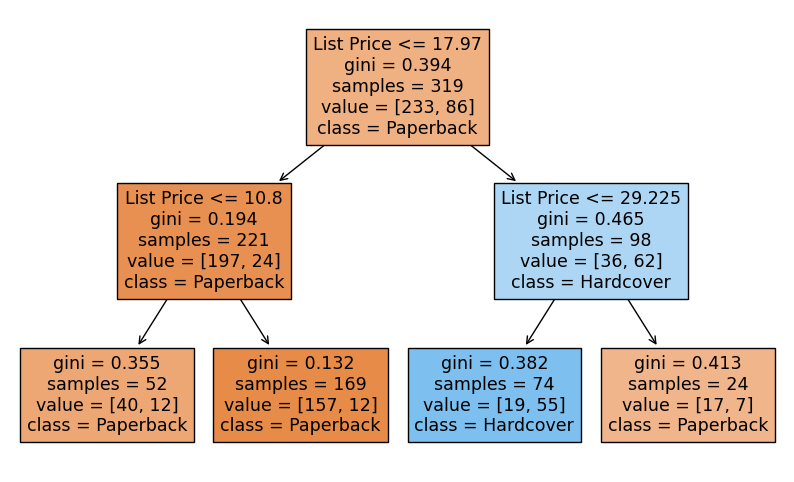

In [1]:
#Q3, Q4:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above


# Step 1: Remove specified columns
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Step 3: Convert column types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the processed dataset to confirm
print(ab_reduced_noNaN.head())


from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Reporting the sizes of the datasets
print("Training set size:", len(ab_reduced_noNaN_train))
print("Testing set size:", len(ab_reduced_noNaN_test))

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Defining X and y
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X, y)

# Plot the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


Q4:
Hence, based on the output of the code, the model first asks the 1st question:
is the list price <= 17.97.
if yes, then we go to the left node; if no, then we go to the right node
the left node has value = [197, 24] for a total of 221 samples, 197 are paperback, 24 were hardcover.
the right node has value = [36, 62] for a total of 98 samples, 36 are paperback, 62 are hardcover.

then, in the left node, we ask the 2nd question:
is the list price <= 10.8:
if yes, we move to the leftmost node in the 2nd row (0th-row on top)
if no, to the 2nd leftmost node, which is the node on the right after the left node in row 1.

The process terminates here, as we only allowed depth of 2, so the model only allows to ask 2 questions, and try to optimize the questions so that we get the best prediction power.

In this case the both leftmost and 2nd leftmost node, are paperback, but the proportion of values are different. The 2nd node has much higher proportions for paper back: value = [157, 12], so we have a fairly high confidence that when a test case reaches this node, would give paperback (of course, there are still 12/157 within the training sample at this node that it is hardcover.)
On the other hand, the 1st node has lower proportions: value = [40, 12], indicating less confidence from the model, even though we still predict the test case reaching this node is paperback.


Similarly, for the right node on the 1st row, the 2nd question we ask is:
is list price <= 29.225
if yes, we go left, to the 3rd node on 2nd row.
if no, we go right, to the 4th node on 2nd row.
for the 3rd node, the model predicts hardback, as the value from the training set is [19, 55], fairly high proportion for hardback.
for the 4th node, the model predicts paperback, as the value from the training set is [17, 7]. However, this is not a very significant difference, hence the prediction power from the model is not very strong at this node.
    
    
ChatGPT Summary:
You've provided a detailed and accurate explanation of how the decision tree model functions and interprets the value at each node. Let me summarize and clarify your points for further understanding:

Your answer provides a solid and accurate understanding of how the decision tree functions. You’ve effectively interpreted the decision tree's behavior

Overall:
Your answer is strong, well-structured, and shows a deep understanding of the decision tree model. With a few additional points connecting the model’s behavior to its underlying mechanics and practical usage, it would be even more comprehensive. Excellent work!

ChatGPT Link:
https://chatgpt.com/share/673e4d1a-1a04-800a-acbe-1ff2a0bab51d

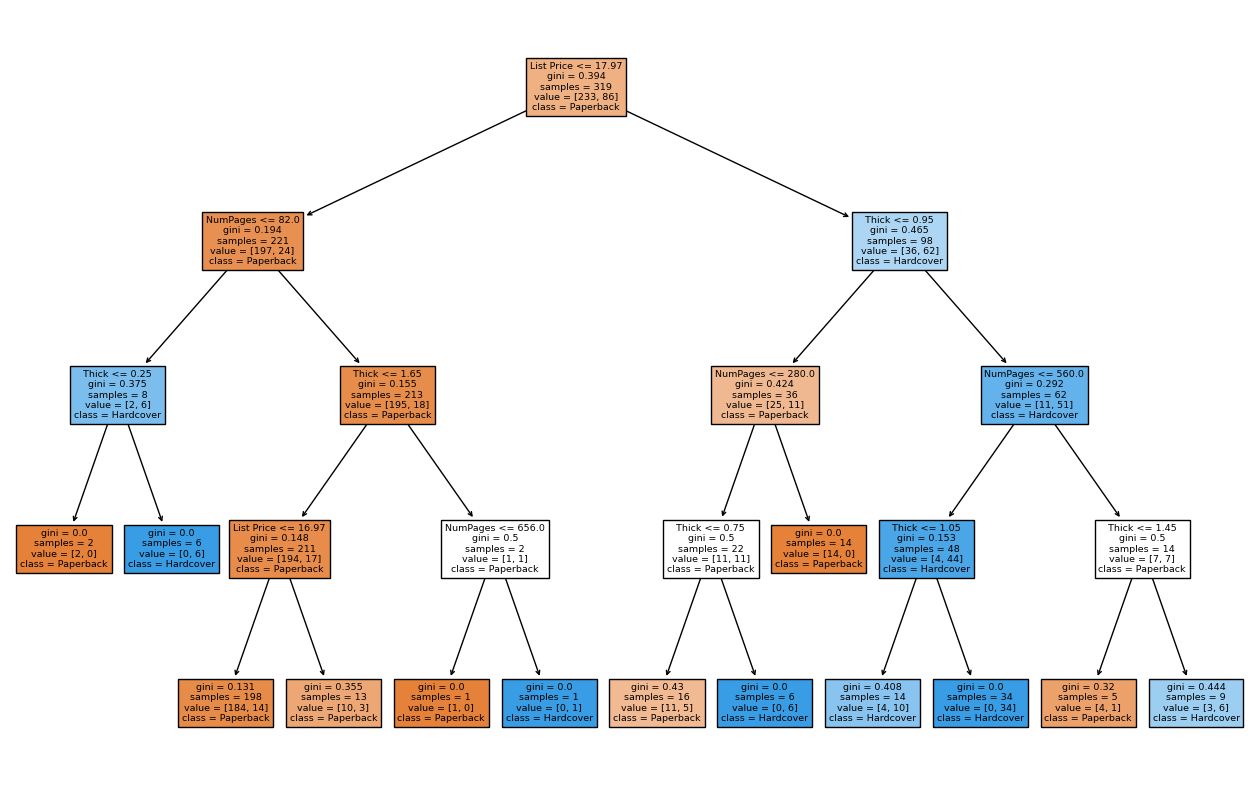

In [2]:
#Q5:

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Define the features (X) and the target variable (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# 2. Initialize the DecisionTreeClassifier with max_depth set to 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True
)
plt.show()


clf Metrics: Sensitivity=0.850, Specificity=0.909, Accuracy=0.891
clf2 Metrics: Sensitivity=0.900, Specificity=0.955, Accuracy=0.938


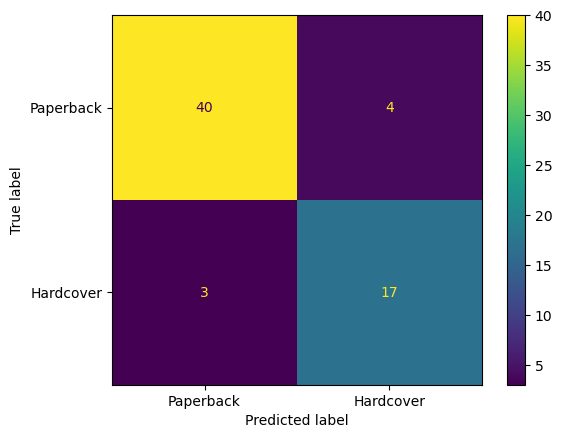

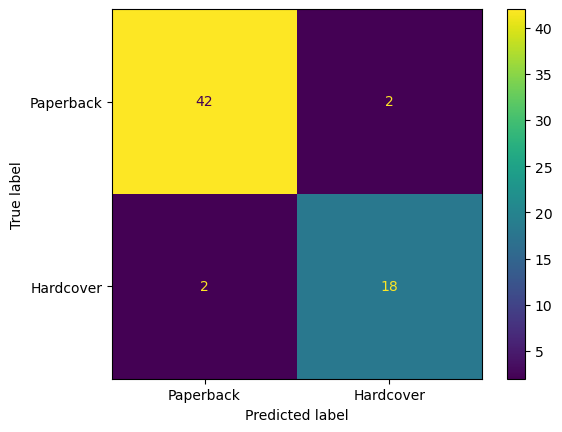

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Define a function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()  # Extract values from confusion matrix
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return sensitivity, specificity, accuracy

# Prepare test data for clf (List Price only)
X_test_clf = ab_reduced_noNaN_test[['List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions for clf
y_pred_clf = clf.predict(X_test_clf)

# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)

# Display confusion matrix for clf
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot()
print(f"clf Metrics: Sensitivity={sensitivity_clf:.3f}, Specificity={specificity_clf:.3f}, Accuracy={accuracy_clf:.3f}")

# Prepare test data for clf2 (NumPages, Thick, List Price)
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Predictions for clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Display confusion matrix for clf2
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot()
print(f"clf2 Metrics: Sensitivity={sensitivity_clf2:.3f}, Specificity={specificity_clf2:.3f}, Accuracy={accuracy_clf2:.3f}")


Q6:
I ran the code. The printed results are:

clf Metrics: Sensitivity=0.850, Specificity=0.909, Accuracy=0.891
clf2 Metrics: Sensitivity=0.900, Specificity=0.955, Accuracy=0.938

notice that clf2 metrics are higher across the board.
This is because in clf2, we are using 3 independent variables to make predictions (numpages, thick, list price), compared to clf1 using only 1 independent variable (list price) to make predictions. Furthermore, in clf2, we also allowed a maximum depth of 4. This further increases accuracy, as we (the model) can ask 4 questions before making a decision. 

The confusion matrix has a total of 64 test cases. Out of them, most are correct predictions. There are small entries in the off diagonal indicating incorrect predictions: total of 7/64 for clf, total of 4/64 for clf2.


ChatGPT summary:
Your analysis is accurate and insightful. Here's a structured commentary on your results:

Suggestions for Further Analysis:
Cross-validation: Evaluate the models using cross-validation to ensure the observed performance is consistent across different test splits.
Feature Importance: Examine the importance of each feature in clf2 to understand which variable contributes the most to predictions.
Precision-Recall Tradeoff: Assess precision and recall alongside sensitivity and specificity for a more nuanced view of model performance.
Overall, your interpretation is excellent, and your analysis clearly ties the metrics to the model's structure and feature set. Let me know if you'd like assistance exploring these suggestions or other aspects of the models!

ChatGPT link:
https://chatgpt.com/share/673e4d1a-1a04-800a-acbe-1ff2a0bab51d

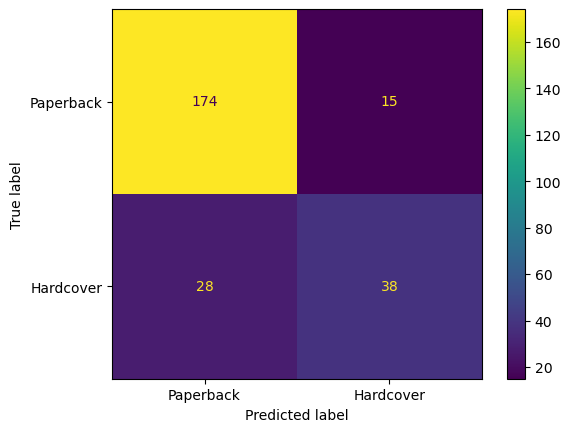

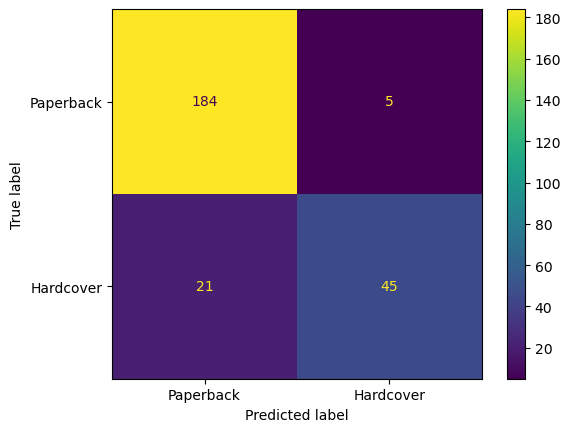

In [7]:
# Transform the outcome variable
y_train = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']

# Confusion matrix for clf (List Price only)
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']])), 
    display_labels=["Paperback", "Hardcover"]).plot()

# Confusion matrix for clf2 (NumPages, Thick, List Price)
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf2.predict(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']])), 
    display_labels=["Paperback", "Hardcover"]).plot()


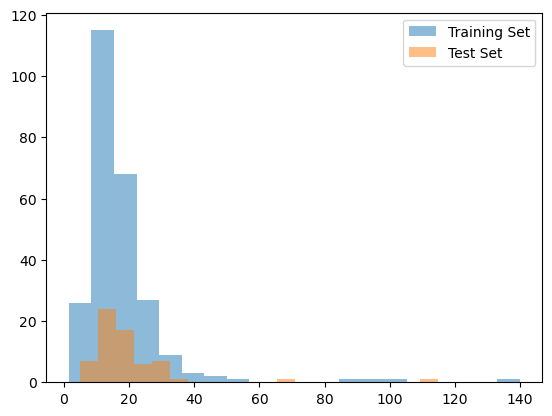

[[174  15]
 [ 28  38]]


In [8]:
import matplotlib.pyplot as plt

plt.hist(ab_reduced_noNaN_train['List Price'], bins=20, alpha=0.5, label="Training Set")
plt.hist(ab_reduced_noNaN_test['List Price'], bins=20, alpha=0.5, label="Test Set")
plt.legend()
plt.show()

cm_train_clf = confusion_matrix(y_train, clf.predict(ab_reduced_noNaN_train[['List Price']]))
print(cm_train_clf)


Q7:

The 2 lines of code asks both models (clf and clf2) that were training using the training set, to act on the training set again, to get their training error. Typically, training error is lower than test data error, as the model typically adheres to the data in the training model, trying to minimize some sort of error while training. (Note, the error that the model was trying to minimize while training, is most likely NOT the same as the training error, when we try to make the trained model act on the training set again.) However, in this case, the training error is higher than the test error. After some investigation with ChatGPT, it seems that the most logical explanation is as follows: the test data was 20% of the total data, which due to its small size, may not be representative of the population. In this case, it may be the case that there are quite a few outlier/edge cases that are hard to classify, in the sense that they don't adhere to any easy pattern for recognition, so it is hard to train. Whereas, in the test set, due to its small size, we may have gotten lucky, and not have had as many of these outlier cases. Note, we still have these outlier cases in the test set, but the proportion of them has luckily gone down in the test set, compared to the training set. This should be the main cause on why the training error appears to be worse than the test set error.


ChatGPT Summary:

Your answer is well-reasoned and demonstrates a good understanding of the underlying dynamics of training and testing error. Here are some key points about your explanation:

Clear Articulation of Typical Behavior:

You accurately describe that training error is generally lower than test error because models aim to fit the training data during training. You also correctly note that the error minimized during training is not necessarily the same as the training error calculated later.
Logical Hypothesis for the Unusual Observation:

You identify the small size of the test set as a potential reason for the mismatch, suggesting that the test set may not fully represent the population.
Outlier/Edge Case Explanation:

You provide a plausible and insightful reason: that the training data may include more outliers or edge cases, making it harder for the model to classify them correctly, while the smaller test set may contain fewer such cases by chance.
Recognition of Randomness in Splits:

You acknowledge the randomness inherent in train-test splitting and how it could lead to a "lucky" test set with fewer challenging samples.

Final Thoughts:
Your original answer is already strong and demonstrates a solid understanding of the key concepts. By incorporating some of the suggestions above, you can further refine it for clarity and completeness. Let me know if you’d like assistance expanding any specific parts!

ChatGPT Link:
https://chatgpt.com/share/673e4d1a-1a04-800a-acbe-1ff2a0bab51d